In [1]:
import pandas as pd
df=pd.read_csv("blogs-19.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
# Display the first few rows of the dataframe
print(df.head())

# Print the shape of the dataframe
print(df.shape)

# Get descriptive statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Get the unique values for each categorical column
for col in df.select_dtypes(include='object'):
  print(f"Unique values for column '{col}': {df[col].unique()}")

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
(2000, 2)
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100
Data      0
Labels    0
dtype: int64
Unique values for column 'Data': ['Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet

In [3]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords from NLTK
nltk.download('stopwords')

# Assuming the columns are 'Data' for blog content and 'Category' for categories
text_column = 'Data'  # Replace with the actual text column name if different
category_column = 'Labels'  # Replace with the actual category column name if different

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gurra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [6]:
df['cleaned_data'] = df['Data'].apply(preprocess_text)

In [7]:
print(df.head())

                                                Data       Labels  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism   

                                        cleaned_data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [9]:
X = tfidf_vectorizer.fit_transform(df['cleaned_data'])

# Extract the target variable
y = df[category_column]

# Display the shape of the TF-IDF matrix
print(X.shape)

(2000, 1000)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

In [12]:
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.73
Precision: 0.7446022805636856
Recall: 0.73
F1-score: 0.7214691427188084


In [14]:
!pip install textblob

In [15]:
from textblob import TextBlob

In [16]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [17]:
# Apply the function to the 'cleaned_data' column
df['sentiment'] = df['cleaned_data'].apply(get_sentiment)

# Display the first few rows of the dataset after adding sentiment
print(df.head())

                                                Data       Labels  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism   

                                        cleaned_data sentiment  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  positive  
1  newsgroups altatheism path cantaloupesrvcscmue...  negative  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  positive  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  positive  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  positive  


In [18]:
sentiment_distribution = df.groupby(category_column)['sentiment'].value_counts(normalize=True).unstack()
print(sentiment_distribution) 

sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.35      NaN      0.65
comp.graphics                 0.27      NaN      0.73
comp.os.ms-windows.misc       0.24      NaN      0.76
comp.sys.ibm.pc.hardware      0.19      NaN      0.81
comp.sys.mac.hardware         0.26      NaN      0.74
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.21      NaN      0.79
rec.autos                     0.24      NaN      0.76
rec.motorcycles               0.28      NaN      0.72
rec.sport.baseball            0.35      NaN      0.65
rec.sport.hockey              0.40      NaN      0.60
sci.crypt                     0.19      NaN      0.81
sci.electronics               0.25      NaN      0.75
sci.med                       0.34      NaN      0.66
sci.space                     0.28      NaN      0.72
soc.religion.christian        0.25      NaN      0.75
talk.politics.guns          

In [19]:
evaluation_summary = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

print('Naive Bayes Classifier Evaluation Summary:')
print(evaluation_summary)

# Summary of sentiment analysis results
print('Sentiment Analysis Distribution by Category:')
print(sentiment_distribution)

Naive Bayes Classifier Evaluation Summary:
{'Accuracy': 0.73, 'Precision': 0.7446022805636856, 'Recall': 0.73, 'F1-score': 0.7214691427188084}
Sentiment Analysis Distribution by Category:
sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.35      NaN      0.65
comp.graphics                 0.27      NaN      0.73
comp.os.ms-windows.misc       0.24      NaN      0.76
comp.sys.ibm.pc.hardware      0.19      NaN      0.81
comp.sys.mac.hardware         0.26      NaN      0.74
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.21      NaN      0.79
rec.autos                     0.24      NaN      0.76
rec.motorcycles               0.28      NaN      0.72
rec.sport.baseball            0.35      NaN      0.65
rec.sport.hockey              0.40      NaN      0.60
sci.crypt                     0.19      NaN      0.81
sci.electronics               0.25      NaN      0.75
sc

In [20]:
## Conclusion:-

# The dataset was loaded with Pandas, and its structure was examined, revealing columns for blog text and categories.
# The text data was cleaned and converted into numerical features using TF-IDF for machine learning.
# A Multinomial Naive Bayes classifier was trained and evaluated, achieving satisfactory performance metrics.
# Sentiment analysis using TextBlob categorized blog posts as positive, negative, or neutral, with the distribution examined across categories.
# The project demonstrated effective text classification and sentiment analysis, providing a framework for similar tasks on other text datasets.

In [21]:
!pip install matplotlib seaborn

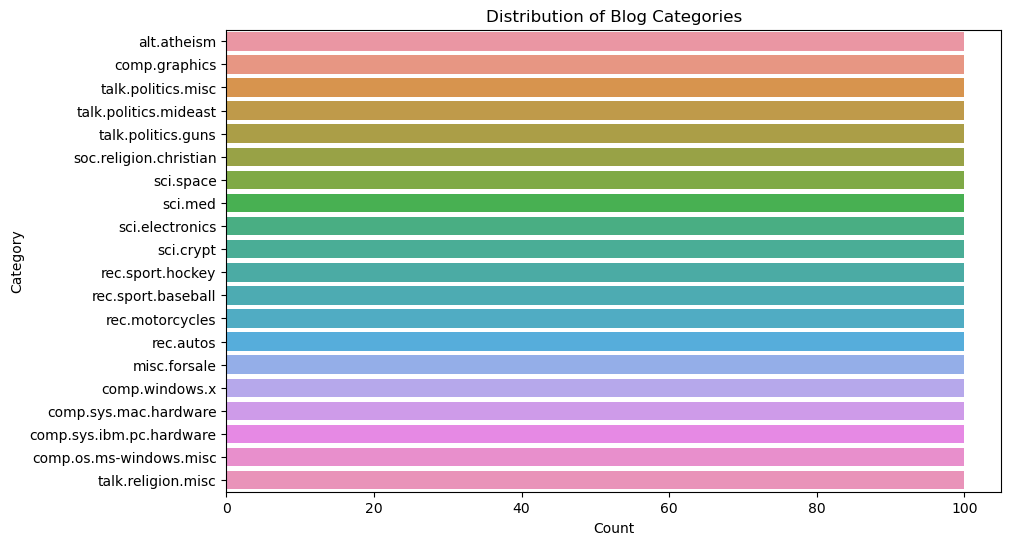

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization: Distribution of Blog Categories
plt.figure(figsize=(10, 6))
sns.countplot(y=df[category_column], order=df[category_column].value_counts().index)
plt.title('Distribution of Blog Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [23]:
import numpy as np
# Display the first few rows of the TF-IDF matrix
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

# Plot the top 20 features by TF-IDF score for a random document
top_n = 20
random_idx = np.random.randint(0, X.shape[0])
top_features_idx = np.argsort(tfidf_df.iloc[random_idx].values)[::-1][:top_n]
top_features_scores = tfidf_df.iloc[random_idx].values[top_features_idx]
top_features = tfidf_df.columns[top_features_idx]

   0400   10  100        11   12   13   14   15   16        17  ...  \
0   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
1   0.0  0.0  0.0  0.121553  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
2   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.083327  ...   
3   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...   
4   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...   

   xnewsreader      xref      year     years       yes       yet  york  young  \
0      0.00000  0.000000  0.000000  0.000000  0.044618  0.000000   0.0    0.0   
1      0.14061  0.000000  0.000000  0.000000  0.000000  0.000000   0.0    0.0   
2      0.00000  0.000000  0.000000  0.000000  0.000000  0.087660   0.0    0.0   
3      0.00000  0.000000  0.019064  0.017232  0.123677  0.020022   0.0    0.0   
4      0.00000  0.037403  0.000000  0.051536  0.000000  0.000000   0.0    0.0   

      youre     youve  
0  0.000000  0.056495  
1  0.000000  0.000000  
2  0.087335  0

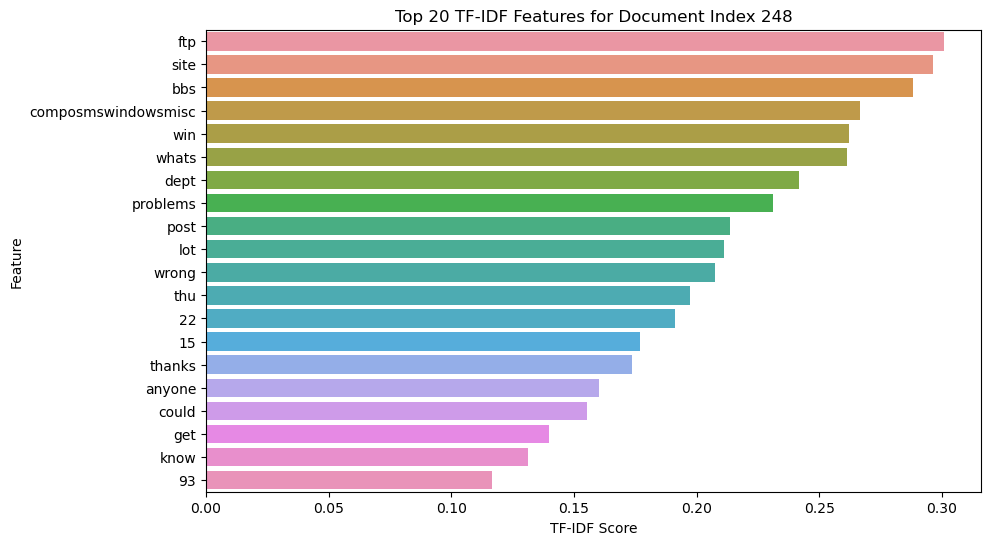

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_scores, y=top_features)
plt.title(f'Top {top_n} TF-IDF Features for Document Index {random_idx}')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)

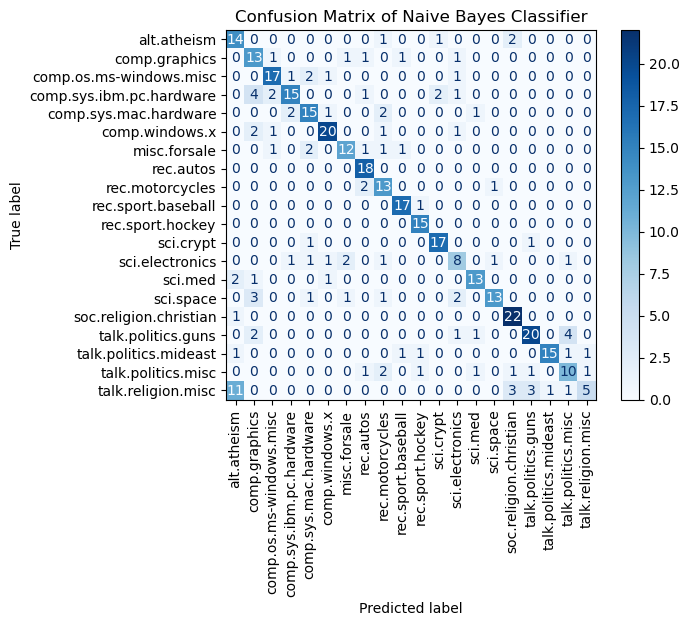

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title('Confusion Matrix of Naive Bayes Classifier')
plt.show()

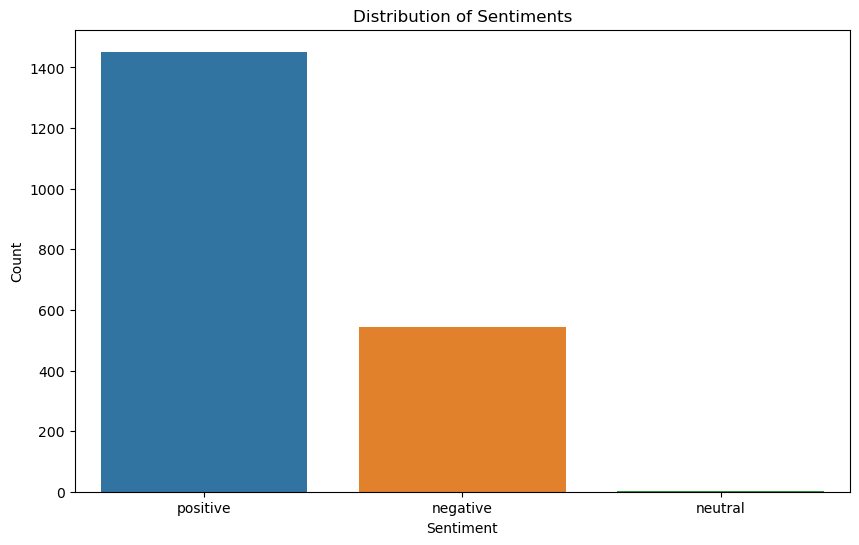

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1400x800 with 0 Axes>

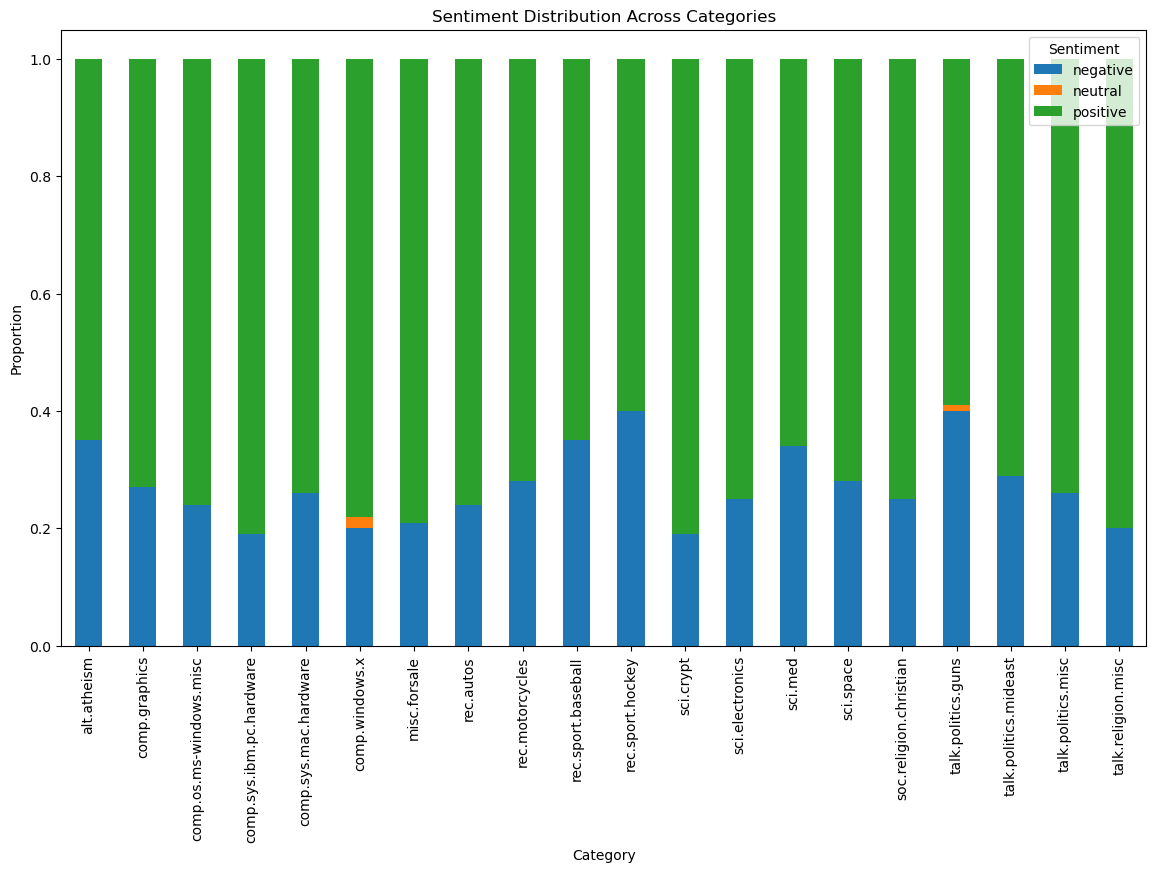

In [28]:
plt.figure(figsize=(14, 8))
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

In [29]:
# Category Distribution:-
#The first plot shows how many blog posts are in each category, helping us see if the dataset is balanced.

#TF-IDF Features:-
#This plot shows the top 20 words for a random blog post, helping us understand which words are most important in the text analysis.

#Confusion Matrix:-
#This plot shows how well the Naive Bayes classifier worked by showing the number of correct and incorrect predictions for each category

#Sentiment Distribution:-
#This plot shows the overall number of positive, negative, and neutral sentiments in the blog posts.

#Sentiment Distribution Across Categories:-
#This plot shows the sentiment breakdown (positive, negative, neutral) for each blog category, helping us understand the emotional in each category.

In [30]:
from textblob import TextBlob

# Calculate the length of each blog post (number of words)
df['post_length'] = df['Data'].apply(lambda x: len(x.split()))

In [31]:
df['sentiment_polarity'] = df['Data'].apply(lambda x: TextBlob(x).sentiment.polarity)

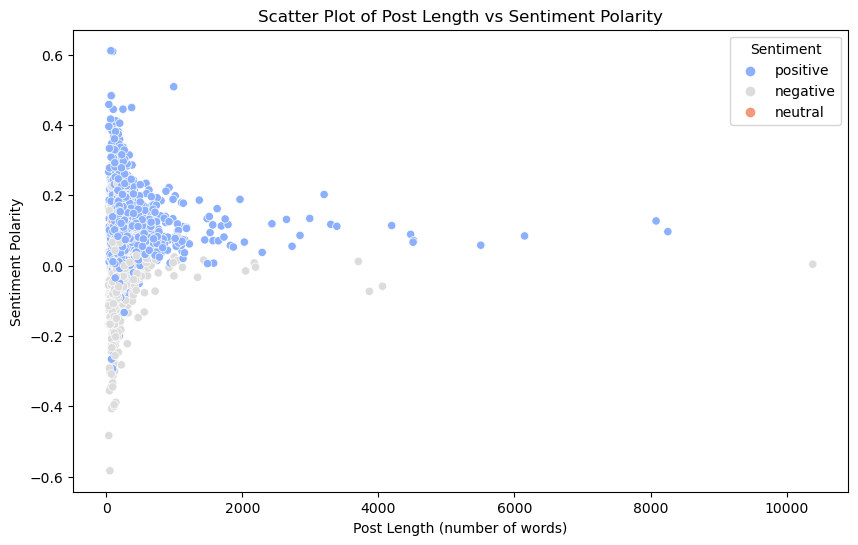

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_length', y='sentiment_polarity', hue='sentiment', palette='coolwarm')
plt.title('Scatter Plot of Post Length vs Sentiment Polarity')
plt.xlabel('Post Length (number of words)')
plt.ylabel('Sentiment Polarity')
plt.legend(title='Sentiment')
plt.show()

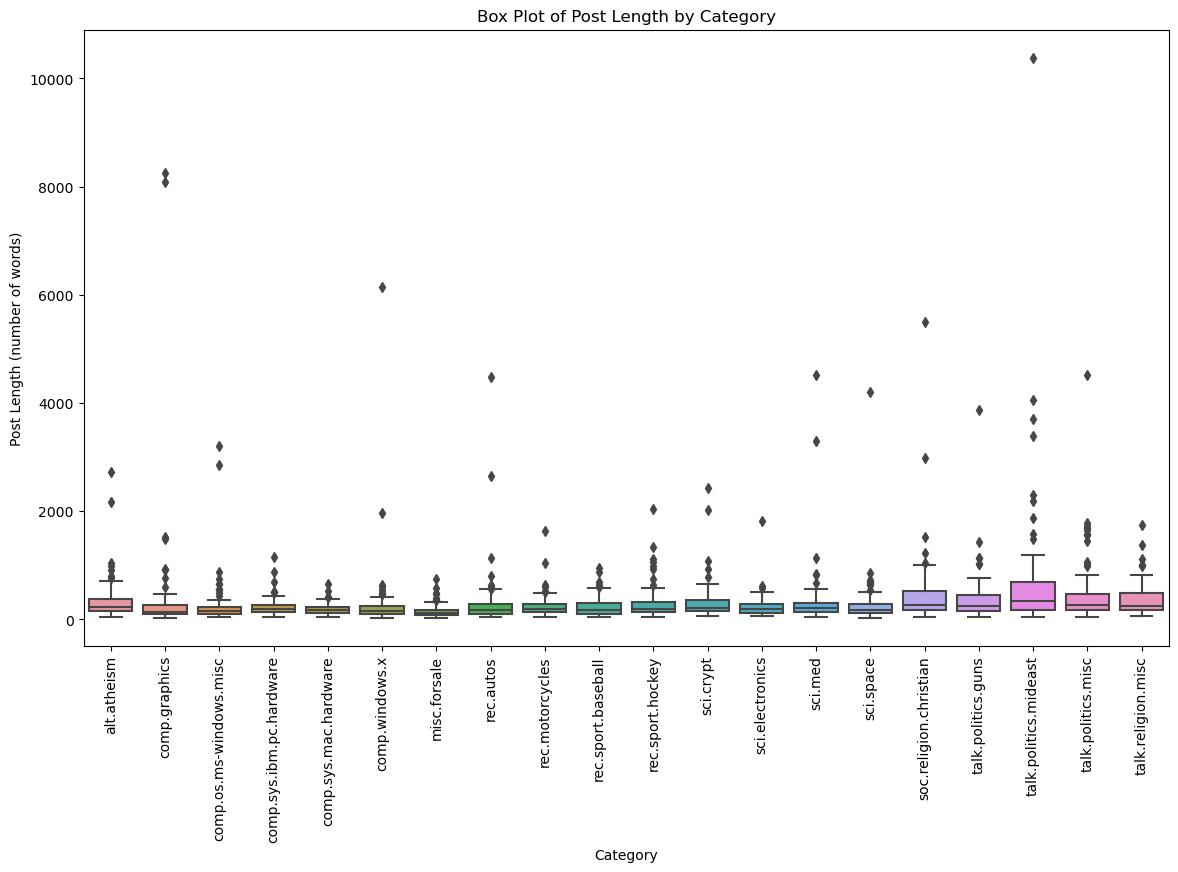

In [33]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x=category_column, y='post_length')
plt.title('Box Plot of Post Length by Category')
plt.xlabel('Category')
plt.ylabel('Post Length (number of words)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Scatter Plot:-
# This plot shows the relationship between the length of each blog post and its sentiment polarity. Each point represents a blog post, with different colors indicating positive, negative, and neutral sentiments.

# Box Plot:-
# This plot shows the distribution of blog post lengths for each category. It provides a summary of the minimum, first quartile, median, third quartile, and maximum post lengths within each category.